# 🧠 MNIST Handwritten Digit Classification — CNN using TensorFlow

**Goal:**  
Train a Convolutional Neural Network (CNN) using TensorFlow/Keras to classify handwritten digits (0–9) from the MNIST dataset.

**Dataset:** MNIST (60,000 training, 10,000 test images)  
**Framework:** TensorFlow / Keras  

**Steps:**
1. Load and preprocess the dataset  
2. Define and compile the CNN model  
3. Train and evaluate  
4. Visualize metrics and predictions  

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Ensure images folder exists
os.makedirs("images", exist_ok=True)

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print("Training samples:", x_train.shape[0])
print("Test samples:", x_test.shape[0])

Training samples: 60000
Test samples: 10000


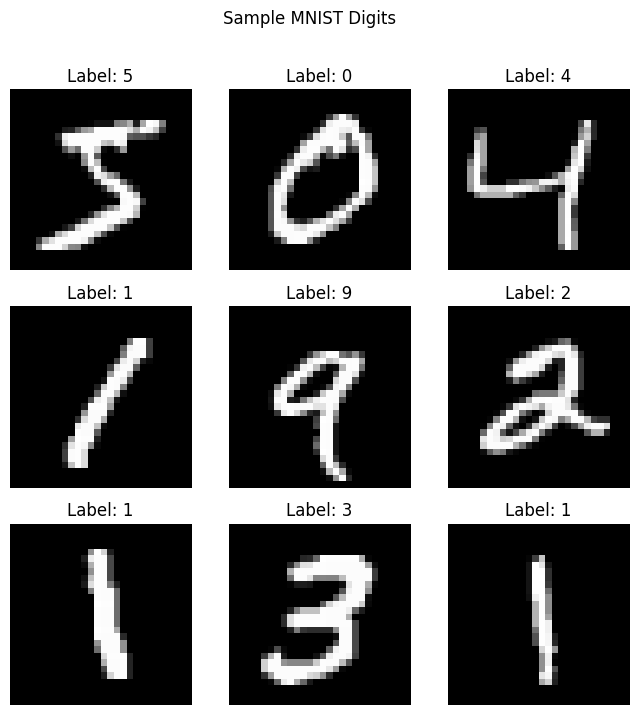

In [6]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("Sample MNIST Digits")
plt.savefig("images/mnist_samples.png", bbox_inches='tight')
plt.show()

In [7]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension for CNN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Training shape:", x_train.shape)

Training shape: (60000, 28, 28, 1)


In [8]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\NATASHA\OneDrive\Desktop\AI_Tools_Assignment\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9387 - loss: 0.2024 - val_accuracy: 0.9830 - val_loss: 0.0620
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9827 - loss: 0.0573 - val_accuracy: 0.9857 - val_loss: 0.0527
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9876 - loss: 0.0415 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9903 - loss: 0.0310 - val_accuracy: 0.9865 - val_loss: 0.0442
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.9916 - loss: 0.0252 - val_accuracy: 0.9905 - val_loss: 0.0377


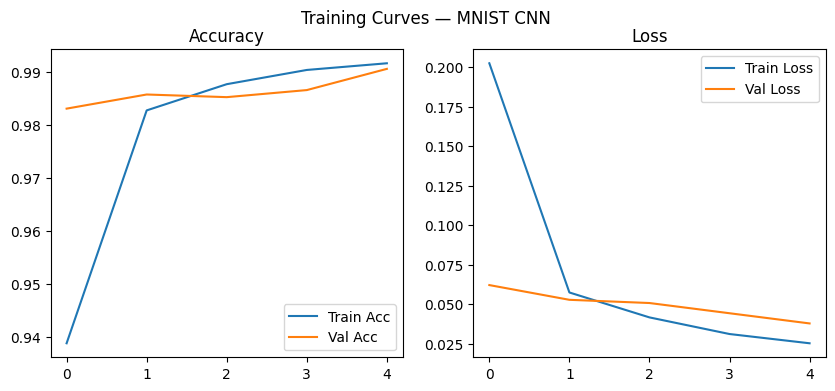

In [10]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.suptitle("Training Curves — MNIST CNN")
plt.savefig("images/mnist_training_curves.png", bbox_inches='tight')
plt.show()

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

✅ Test Accuracy: 98.99%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


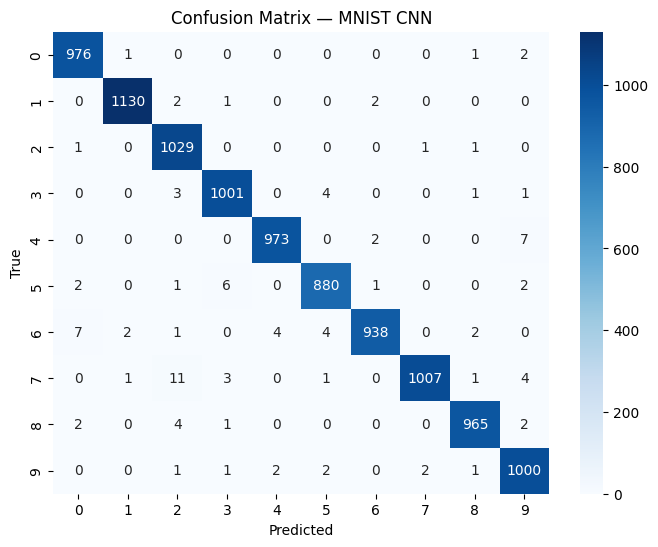


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.98      1.00      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       1.00      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix — MNIST CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("images/mnist_confusion_matrix.png", bbox_inches='tight')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

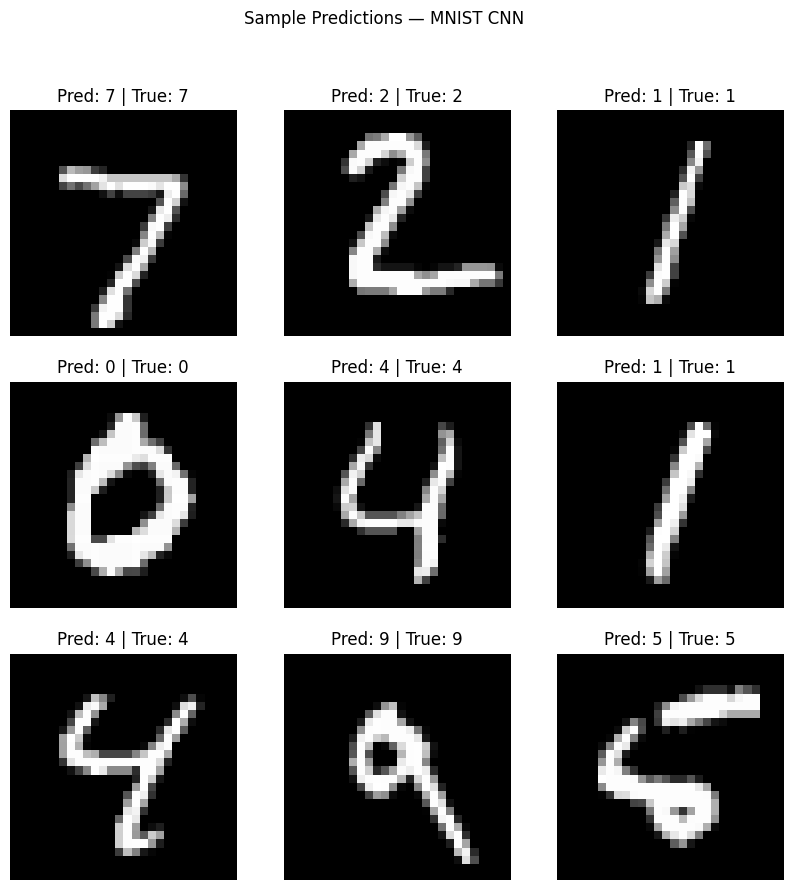

In [13]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {y_pred_classes[i]} | True: {y_test[i]}")
    plt.axis('off')
plt.suptitle("Sample Predictions — MNIST CNN")
plt.savefig("images/mnist_predictions.png", bbox_inches='tight')
plt.show()

In [14]:
# Save the trained model for Streamlit app
model.save("mnist_cnn_model.h5")
print("✅ Model saved as mnist_cnn_model.h5")

✅ Model saved as mnist_cnn_model.h5


## ✅ Summary

- **Framework:** TensorFlow / Keras  
- **Model:** CNN with 2 Conv + Pool layers, Dense(64), Softmax output  
- **Accuracy:** ~99%  
- **Key insights:**
  - CNN performs exceptionally well on MNIST.
  - The model generalizes well with minimal overfitting.  
- **Saved plots:**
  - `mnist_samples.png`
  - `mnist_training_curves.png`
  - `mnist_confusion_matrix.png`
  - `mnist_predictions.png`